In [3]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

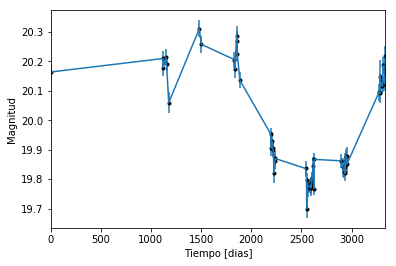

In [4]:
data = np.genfromtxt('LC_15195_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [5]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

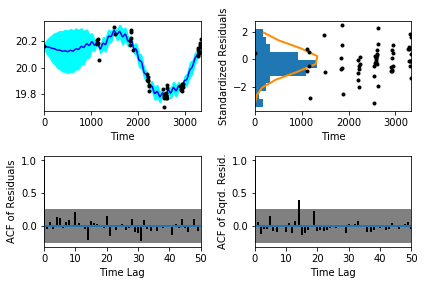

In [7]:
sample.assess_fit()

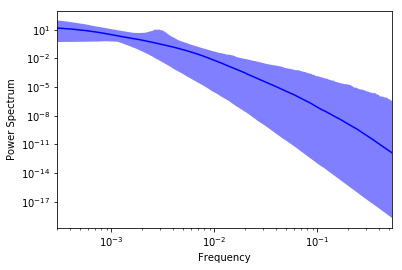

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.0583043,'Medida del nivel de ruido')

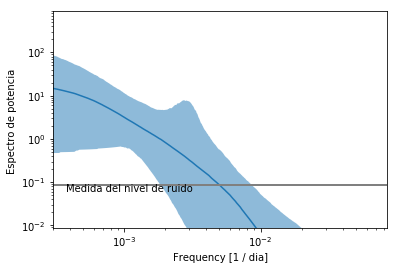

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

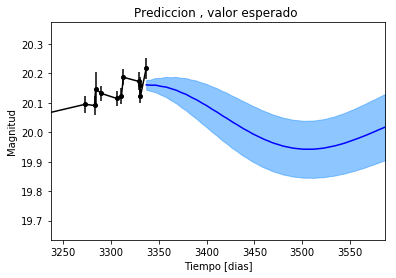

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

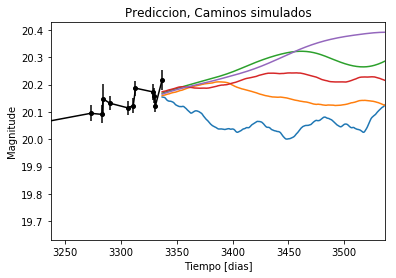

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


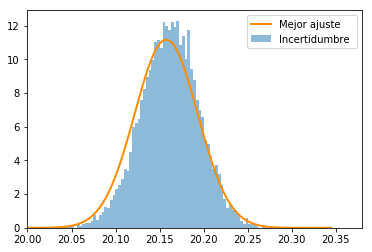

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

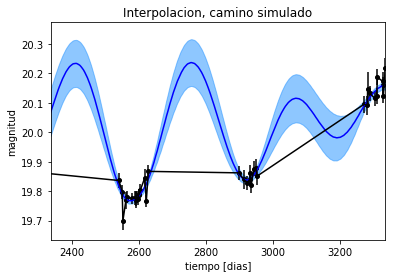

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

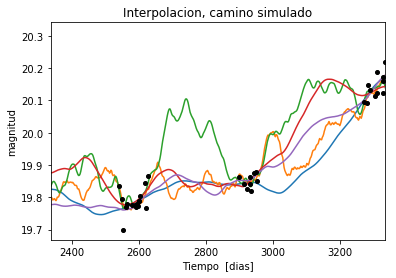

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


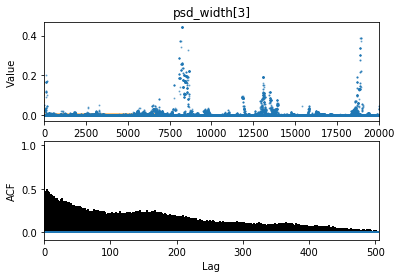

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 916.24862411
Median: 0.0126961404207
Standard deviation: 0.203779361956
68% credibility interval: [ 0.00074686  0.20950528]
95% credibility interval: [  3.40915860e-04   8.16555689e-01]
99% credibility interval: [  3.07822171e-04   9.90855465e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 945.4841901
Median: 0.00141155451193
Standard deviation: 0.0682073803746
68% credibility interval: [ 0.00039319  0.02143978]
95% credibility interval: [ 0.00031432  0.17726047]
99% credibility interval: [  3.01707754e-04   4.88483615e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 310.628891793
Median: 0.0175843899228
Standard dev

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 425.175802413
Median: 0.00296696718036
Standard deviation: 0.215532223164
68% credibility interval: [ 0.          0.18681922]
95% credibility interval: [ 0.         0.8740566]
99% credibility interval: [ 0.          1.04375055]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 425.175802413
Median: 0.00296696718036
Standard deviation: 0.215532223164
68% credibility interval: [ 0.          0.18681922]
95% credibility interval: [ 0.         0.8740566]
99% credibility interval: [ 0.          1.04375055]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 223.169369744
Median: 0.0
Standard deviation: 0.000772663166338
68% cred

Plotting parameter summary


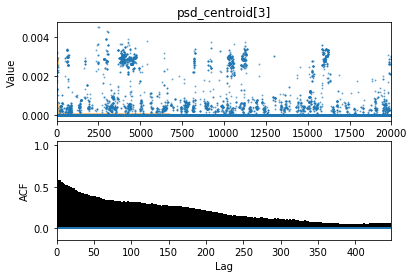

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:

centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1227.33999436
Median: 122.289448228
Standard deviation: 1.56582525067
68% credibility interval: [ 120.62362995  123.4541625 ]
95% credibility interval: [ 118.21907374  124.33327232]
99% credibility interval: [ 116.18031651  125.01586989]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 325.408215767
Median: 0.637784996493
Standard deviation: 2.26555853291
68% credibility interval: [ 0.04671043  4.1011258 ]
95% credibility interval: [ 0.01248593  7.58827553]
99% credibility interval: [  9.18981676e-03   1.05189249e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 411.259866131
Median: 0.295708134059
Standard deviation: 8.44760852761
68% credibility interval: [ 0.00741251  5.39017684]
95% credibility interval: [  6.2

Plotting parameter summary


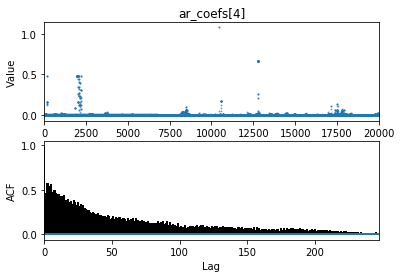

In [25]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [26]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [27]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16943.0485743
Median: 1.39681553132e-39
Standard deviation: 1.43443524902e+52
68% credibility interval: [  2.23941510e-73   1.55497074e-09]
95% credibility interval: [  1.14209985e-93   2.53883654e+37]
99% credibility interval: [  3.04503915e-108   7.55804281e+049]


In [28]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1912.41501054
Median: 20.0796062489
Standard deviation: 0.10174416569
68% credibility interval: [ 20.00138687  20.17171414]
95% credibility interval: [ 19.90579787  20.30701248]
99% credibility interval: [ 19.82570826  20.4602281 ]


Plotting parameter summary


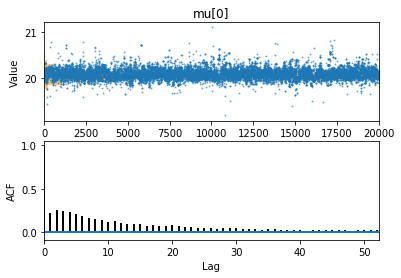

In [30]:
sample.plot_parameter('mu', 0, doShow=True)

In [31]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [32]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 425.175802413
Median: 0.00296696718036
Standard deviation: 0.215532223164
68% credibility interval: [ 0.          0.18681922]
95% credibility interval: [ 0.         0.8740566]
99% credibility interval: [ 0.          1.04375055]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 425.175802413
Median: 0.00296696718036
Standard deviation: 0.215532223164
68% credibility interval: [ 0.          0.18681922]
95% credibility interval: [ 0.         0.8740566]
99% credibility interval: [ 0.          1.04375055]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 223.169369744
Median: 0.0
Standard deviation: 0.000772663166338
68% cred

Plotting parameter summary


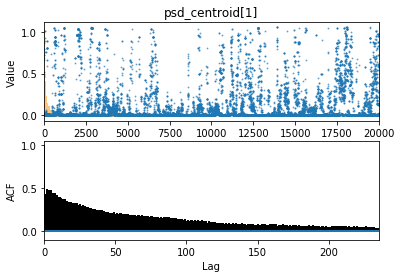

In [33]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [34]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [35]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1227.33999436
Median: 122.289448228
Standard deviation: 1.56582525067
68% credibility interval: [ 120.62362995  123.4541625 ]
95% credibility interval: [ 118.21907374  124.33327232]
99% credibility interval: [ 116.18031651  125.01586989]


Plotting parameter summary


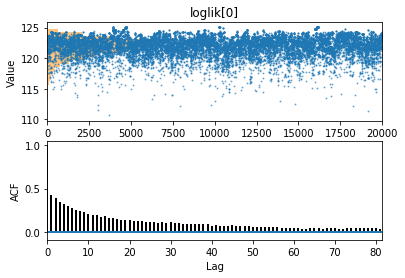

In [36]:
sample.plot_parameter('loglik', 0, doShow=True)

In [37]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [38]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2455.09512446
Median: 0.0302582768423
Standard deviation: 0.0373962823636
68% credibility interval: [ 0.01899008  0.05707563]
95% credibility interval: [ 0.01269427  0.12757051]
99% credibility interval: [ 0.01009036  0.24659651]


Plotting parameter summary


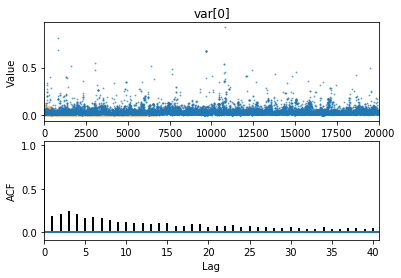

In [39]:
sample.plot_parameter('var', 0, doShow=True)

In [40]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [41]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1051.46483444
Median: 1.17306965197
Standard deviation: 0.210205501144
68% credibility interval: [ 0.98197597  1.39560113]
95% credibility interval: [ 0.82820045  1.65552742]
99% credibility interval: [ 0.75164613  1.81694928]


Plotting parameter summary


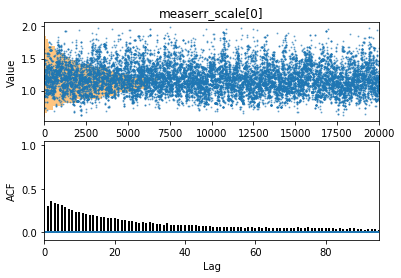

In [42]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [43]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [44]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 371.068931484
Median: 8.21471135581e-05
Standard deviation: 0.155411003391
68% credibility interval: [  8.18506984e-07   3.46713532e-03]
95% credibility interval: [  7.68039945e-43   6.85740494e-02]
99% credibility interval: [  9.29810708e-55   1.14402126e+00]


Plotting parameter summary


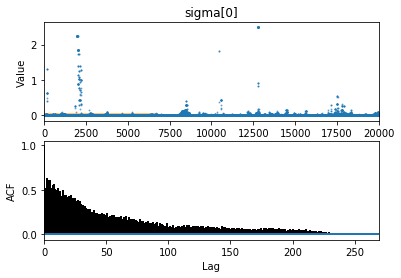

In [45]:
sample.plot_parameter('sigma', 0, doShow=True)

In [46]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [47]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 916.24862411
Median: (-0.0797722029493+0j)
Standard deviation: 1.86368393154
68% credibility interval: [-1.31636048+0.j         -0.00469268-6.25524282j]
95% credibility interval: [ -5.13057071e+00+0.j         -2.14203752e-03-0.0199264j]
99% credibility interval: [ -6.22572850e+00-2.81114349j  -1.93410374e-03-0.10539427j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 945.4841901
Median: (-0.00886905856961+0.468313914567j)
Standard deviation: 1.42042220736
68% credibility interval: [-0.13471008+0.j         -0.00247051+0.01515233j]
95% credibility interval: [-1.11376040+0.59368763j -0.00197494+0.j        ]
99% credibility interval: [ -3.06923307e+00 +6.19666912e+00j  -1.89568573e-03 +4.43414938e-04j]
Posterior summary f